My functions

Importing libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

In [4]:
!ls DATA/


2017-05-12_batchdata_updated_struct_errorcorrect.mat
2017-06-30_batchdata_updated_struct_errorcorrect.mat
2018-04-12_batch8_CH17.csv
2018-04-12_batch8_CH36.csv
2018-04-12_batch8_CH38.csv
2018-04-12_batchdata_updated_struct_errorcorrect.mat


In [7]:
data = pd.read_csv('./DATA/2018-04-12_batch8_CH17.csv')
cycles = data.groupby('Cycle_Index')
cycle_dict = {}

for i in cycles:
    cycle_dict[i[0]] = i[1]

cycle_dict[11].head()

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature,Aux_Voltage
10666,10666,133742.3486,1.523717e+09,0.0609,3,11,0.380318,2.082721,2.876959e-07,0.0,5.949935e-07,0.0,0.011868,0.015442,32.881642,NaN
10667,10667,133742.3885,1.523717e+09,0.1008,3,11,0.717720,2.108266,2.876959e-07,0.0,5.949935e-07,0.0,0.011868,0.015442,32.881784,NaN
10668,10668,133742.4191,1.523717e+09,0.1314,3,11,0.958553,2.131673,2.876959e-07,0.0,5.949935e-07,0.0,0.011868,0.015442,32.881892,NaN
10669,10669,133742.4526,1.523717e+09,0.1649,3,11,1.292526,2.170840,2.876959e-07,0.0,5.949935e-07,0.0,0.011868,0.015442,32.882012,NaN
10670,10670,133742.4893,1.523717e+09,0.2016,3,11,1.581421,2.209589,2.876959e-07,0.0,5.949935e-07,0.0,0.011868,0.015442,32.882142,NaN


Text(0.5, 0, 'Time')

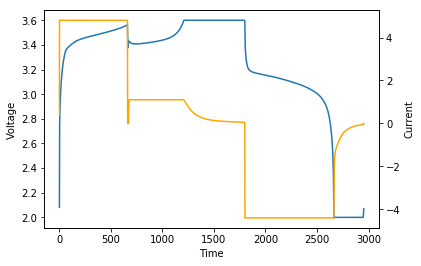

In [8]:
fig = plt.figure()

cycle_number = 11

ax = fig.add_subplot(111)
ax.plot(cycle_dict[cycle_number]['Test_Time'] - cycle_dict[cycle_number]['Test_Time'].iloc[0], cycle_dict[cycle_number]['Voltage'])
ax1 = ax.twinx()
ax1.plot(cycle_dict[cycle_number]['Test_Time'] - cycle_dict[cycle_number]['Test_Time'].iloc[0], cycle_dict[cycle_number]['Current'], color = 'orange')

ax.set_ylabel('Voltage')
ax1.set_ylabel('Current')
ax.set_xlabel('Time')

In [9]:
cycle_dict[11].tail()

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature,Aux_Voltage
11443,11443,136692.5144,1.523720e+09,1.0008,10,11,0.0,2.019137,1.070404,1.070373,3.695478,3.271221,0.017941,0.015429,32.760574,NaN
11444,11444,136693.5305,1.523720e+09,2.0169,10,11,0.0,2.033884,1.070404,1.070373,3.695478,3.271221,0.015228,0.015429,32.746740,NaN
11445,11445,136694.5447,1.523720e+09,3.0311,10,11,0.0,2.047065,1.070404,1.070373,3.695478,3.271221,0.013474,0.015429,32.732932,NaN
11446,11446,136695.5404,1.523720e+09,4.0268,10,11,0.0,2.058915,1.070404,1.070373,3.695478,3.271221,0.012477,0.015429,32.719376,NaN
11447,11447,136696.5144,1.523720e+09,5.0008,10,11,0.0,2.069838,1.070404,1.070373,3.695478,3.271221,0.012477,0.015429,32.712444,NaN


In [26]:
cycle100 = cycle_dict[100]
cycle10 = cycle_dict[10]

discharge100 = cycle100[cycle100['Current'] < 0.0]
discharge10 = cycle10[cycle10['Current'] < 0.0]

discharge10.tail(30)

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature,Aux_Voltage
10631,10631,133596.3608,1.523716e+09,1009.1943,9,10,-0.261962,1.999982,1.070213,1.068150,3.695176,3.266877,3.051758e-05,0.015442,33.690464,NaN
10632,10632,133601.3679,1.523716e+09,1014.2014,9,10,-0.246553,1.999979,1.070213,1.068289,3.695176,3.267155,-3.814697e-06,0.015442,33.640636,NaN
10633,10633,133606.3926,1.523716e+09,1019.2261,9,10,-0.231358,2.000015,1.070213,1.068418,3.695176,3.267415,-7.629394e-06,0.015442,33.644821,NaN
10634,10634,133611.4203,1.523716e+09,1024.2538,9,10,-0.219055,1.999990,1.070213,1.068541,3.695176,3.267660,-2.384186e-05,0.015442,33.609016,NaN
10635,10635,133616.4350,1.523716e+09,1029.2685,9,10,-0.205603,1.999864,1.070213,1.068658,3.695176,3.267894,7.057190e-05,0.015442,33.571636,NaN
10636,10636,133621.4643,1.523716e+09,1034.2978,9,10,-0.180393,2.000008,1.070213,1.068770,3.695176,3.268119,1.907349e-06,0.015442,33.546818,NaN
10637,10637,133626.4835,1.523716e+09,1039.3170,9,10,-0.171338,2.000011,1.070213,1.068874,3.695176,3.268327,-9.536743e-06,0.015442,33.523876,NaN
10638,10638,133631.5103,1.523716e+09,1044.3438,9,10,-0.159991,2.000011,1.070213,1.068973,3.695176,3.268524,-1.049042e-05,0.015442,33.495290,NaN
10639,10639,133636.5280,1.523716e+09,1049.3615,9,10,-0.149224,2.000014,1.070213,1.069067,3.695176,3.268712,-2.288818e-05,0.015442,33.430038,NaN
10640,10640,133641.5432,1.523716e+09,1054.3767,9,10,-0.140823,1.999962,1.070213,1.069157,3.695176,3.268892,6.675720e-06,0.015442,33.479354,NaN


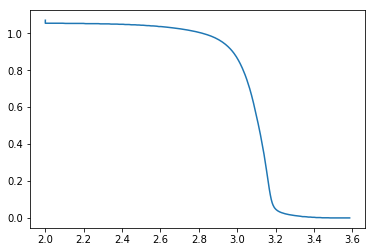

In [29]:
plt.plot(discharge10['Voltage'],discharge10['Discharge_Capacity'])

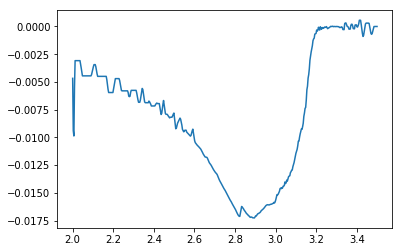

In [55]:
v_low = 2.0
v_high = 3.5
npoint = 500
x_common = np.linspace(v_low,v_high,num=npoint,endpoint=True)
f10=interp1d(discharge10['Voltage'],discharge10['Discharge_Capacity'])
f100=interp1d(discharge100['Voltage'],discharge100['Discharge_Capacity'])
dy_common=f100(x_common)-f10(x_common)
plt.plot(x_common,dy_common)

In [84]:
from math import log
from math import sqrt

# Minimum
print('Minimum of dQ:',log(abs(min(dy_common))))

# Mean
#lets find the close to 0 points, eg. 1/10 of max
npoint2=sum(dy_common<(min(dy_common))/20)

#print(npoint2)
dq_mean = sum(dy_common)/npoint2     ##
print('Average dQ between XXX : ', log(abs(dq_mean)))

dq_min = min(dy_common)              ##

dy_difference = dy_common-dq_mean

# Variance
V = sum(dy_difference**2)/(npoint2-1)
V = log(abs(V))
print('Variance:', V)

# Skewness

S = sum(dy_difference**3)/npoint2/(sqrt(sum(dy_difference**2))**3)
S = log(abs(S))
print('Skewness:', S)

# Kurtosis
 
K = sum((dy_difference**4)/npoint2/(sum(dy_difference**2)/npoint2)**2)    
K = log(abs(K))
print('Kurtosis:',K)

Minimum of dQ: -4.059676150225309
Average dQ between XXX :  -4.620874270433458
Variance: -9.98497759123268
Skewness: -9.315874267140272
Kurtosis: 0.38942103724733373
